In [ ]:

"""A Lightweight Computational Neural Network Model for Detecting and Classifying BC"""
 # Import necessary
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths

# Import OpenCV
import cv2

# Utility
import os
import numpy as np
import itertools
import random
from collections import Counter
from glob import iglob

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

# Confusion Matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report

# Plot
import matplotlib.pyplot as plt

import argparse
# Utility
import itertools
import random
from collections import Counter
import tensorflow as tf



In [ ]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Load image paths for different classes
from glob import glob
from google.colab.patches import cv2_imshow
tungiasis =glob('/content/gdrive/MyDrive/labeled/tungiasis*/*')
pityriasis_rubra_pilaris =glob('/content/gdrive/MyDrive/labeled/psoriasis*/*')
porokeratosis_actinic =glob('/content/gdrive/MyDrive/labeled/porokeratosis actinic*/*')






In [ ]:
# Display the number of images in each class
print("len lst imgs tungiasis = ", len(tungiasis))
print("len lst imgs pityriasis_rubra_pilaris = ", len(pityriasis_rubra_pilaris))
print("len lst imgs porokeratosis_actinic = ", len(porokeratosis_actinic))


len lst imgs tungiasis =  107
len lst imgs pityriasis_rubra_pilaris =  104
len lst imgs porokeratosis_actinic =  125


In [ ]:
# Function to read and preprocess images from a list of file paths
def read_images(data):
  lst_images = []
# Iterate through each image file path in the given list
  for i in range(len(data)):
        # Read the image in grayscale
        img = cv2.imread(data[i], 0)
        # Convert the image to RGB format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))
        # Append the preprocessed image to the list
        lst_images.append(img)
  return lst_images


In [ ]:
# Read images for different classes

lst_tungiasis  = read_images(tungiasis)
lst_pityriasis_rubra_pilaris   = read_images(pityriasis_rubra_pilaris)
lst_porokeratosis_actinic   = read_images(porokeratosis_actinic)
# Create a figure for plotting
fig = plt.figure()
# Display the number of images in each class
print("len lst_tungiasis = ", len(lst_tungiasis))
print("len lst_pityriasis_rubra_pilaris  = ", len(lst_pityriasis_rubra_pilaris))
print("len lst_porokeratosis actinic  = ", len(lst_porokeratosis_actinic))


len lst_tungiasis =  107
len lst_pityriasis_rubra_pilaris  =  104
len lst_porokeratosis actinic  =  125


<Figure size 640x480 with 0 Axes>

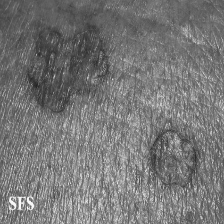

In [ ]:
###################
# Data preprocessing

# Shuffle the dataset. benign = tungiasis. pityriasis_rubra_pilaris = 2 . porokeratosis_actinic=3
raw_data =[]
raw_labels = []
# Iterate through a range of 89 (assuming len(lst_tungiasis), etc., is 104)
for i in range(104):
    # Alternate between benign and malignant classes
    if i % 2 == 0:
        raw_data.append(lst_tungiasis[i])
        raw_data.append(lst_pityriasis_rubra_pilaris[i])
        raw_data.append(lst_porokeratosis_actinic[i])
        raw_labels.append(1)
        raw_labels.append(2)
        raw_labels.append(3)
    else:
        raw_data.append(lst_tungiasis[i])
        raw_data.append(lst_pityriasis_rubra_pilaris[i])
        raw_data.append(lst_porokeratosis_actinic[i])
        raw_labels.append(1)
        raw_labels.append(2)
        raw_labels.append(3)

# Display an image from the preprocessed data
cv2_imshow(lst_porokeratosis_actinic[0])

In [ ]:
print(raw_labels)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


In [ ]:
# Shuffle the labels and data to introduce randomness in the order
random.shuffle(raw_labels)
print(raw_labels)

[1, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2, 1, 3, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 2, 1, 3, 2, 3, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 3, 2, 2, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 1, 1, 1, 2, 3, 1, 3, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 3, 2, 3, 2, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1]


In [ ]:
random.shuffle(raw_labels)
random.shuffle(raw_data)
raw_data

[array([[[148, 148, 148],
         [156, 156, 156],
         [131, 131, 131],
         ...,
         [ 76,  76,  76],
         [ 77,  77,  77],
         [ 78,  78,  78]],
 
        [[146, 146, 146],
         [147, 147, 147],
         [138, 138, 138],
         ...,
         [ 76,  76,  76],
         [ 77,  77,  77],
         [ 78,  78,  78]],
 
        [[107, 107, 107],
         [136, 136, 136],
         [156, 156, 156],
         ...,
         [ 76,  76,  76],
         [ 77,  77,  77],
         [ 78,  78,  78]],
 
        ...,
 
        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 49,  49,  49],
         ...,
         [ 98,  98,  98],
         [ 99,  99,  99],
         [ 99,  99,  99]],
 
        [[ 51,  51,  51],
         [ 53,  53,  53],
         [ 52,  52,  52],
         ...,
         [ 98,  98,  98],
         [ 99,  99,  99],
         [ 99,  99,  99]],
 
        [[ 55,  55,  55],
         [ 54,  54,  54],
         [ 52,  52,  52],
         ...,
         [ 98,  98,  98],
  

In [ ]:
# Data normalization: Scale the pixel values to the range [0, 1]
data = np.array(raw_data) / 255.0
labels = np.array(raw_labels)

# Convert class labels to one-hot encoded vectors
lb = LabelEncoder()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Display the shapes of training and testing sets
print("Xtrain : ", trainX.shape, "  Xtest : ", testX.shape)

# Initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Xtrain :  (249, 224, 224, 3)   Xtest :  (63, 224, 224, 3)


In [ ]:
# Define constants for image size and shape
IMAGE_SIZE=224
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [ ]:
# Print the shapes of training and testing sets
print(" trainX shape = ", trainX.shape)
print("ltestX shape  = ", testX.shape)



 trainX shape =  (249, 224, 224, 3)
ltestX shape  =  (63, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV3Small

# Assuming you have already loaded and preprocessed your data into trainX and testX
# Replace 'input_shape' with the shape of your input images

# Build MobileNetV3 model
input_shape = (224, 224, 3)  # adjust input shape based on your images
num_classes = 3

# Use the pre-trained MobileNetV3Small model as the base model
base_model = MobileNetV3Small(input_shape=input_shape, include_top=False, weights='imagenet')

# Create a Sequential model
model = models.Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add Global Average Pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a Dense layer with 256 units and ReLU activation
model.add(layers.Dense(256, activation='relu'))

# Add a Dropout layer with dropout rate of 0.5 for regularization
model.add(layers.Dropout(0.5))

# Add the final Dense layer with softmax activation for classification
model.add(layers.Dense(num_classes, activation='softmax'))
total_layers = len(model.layers) + len(base_model.layers)
print("Total Number of Layers:", total_layers)

4334752/4334752 [==============================] - 0s 0us/step
Total Number of Layers: 234


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               147712    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1087603 (4.15 MB)
Trainable params: 107549

In [ ]:
# Train the model
batch_size =10
epochs = 20  # Adjust the number of epochs based on your requirements

history = model.fit(trainAug.flow(trainX, trainY, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(testX, testY))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(testX, testY)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



Epoch 1/20
25/25 [==============================] - 18s 329ms/step - loss: 1.2988 - accuracy: 0.3534 - val_loss: 1.1677 - val_accuracy: 0.3333
Epoch 2/20
25/25 [==============================] - 7s 283ms/step - loss: 1.1510 - accuracy: 0.2972 - val_loss: 1.1288 - val_accuracy: 0.3333
Epoch 3/20
25/25 [==============================] - 8s 314ms/step - loss: 1.1024 - accuracy: 0.3574 - val_loss: 1.1615 - val_accuracy: 0.3333
Epoch 4/20
25/25 [==============================] - 8s 302ms/step - loss: 1.1428 - accuracy: 0.3173 - val_loss: 1.3645 - val_accuracy: 0.3333
Epoch 5/20
25/25 [==============================] - 7s 283ms/step - loss: 1.1295 - accuracy: 0.3414 - val_loss: 1.1648 - val_accuracy: 0.3333
Epoch 6/20
25/25 [==============================] - 8s 301ms/step - loss: 1.1076 - accuracy: 0.3213 - val_loss: 1.1289 - val_accuracy: 0.3333
Epoch 7/20
25/25 [==============================] - 7s 273ms/step - loss: 1.0878 - accuracy: 0.3735 - val_loss: 1.1333 - val_accuracy: 0.3333
Epoch

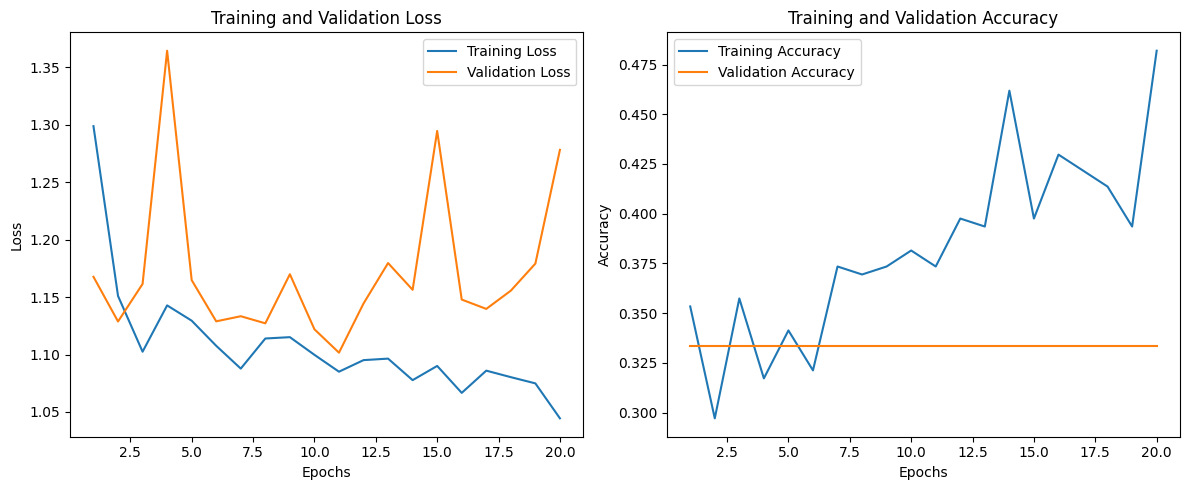

In [ ]:
# Extract training loss, validation loss, training accuracy, and validation accuracy from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()